<a href="https://colab.research.google.com/github/MarcosACVieira/geral/blob/main/Definitivo_vTeste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import LSTM, Dense, Dropout,SimpleRNN,Conv1D,MaxPooling1D,Flatten
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
btg = ['11435287000107', '29982932000169', '16839141000132', '41992740000139', '26112022000137', '27923072000167', '42730970000192', '29993579000112', '39800632000175', '35744790000102', '45294958000170', '32892819000105', '26680221000141', '05488919000190', '13812165000100', '31556580000121', '39958394000120', '35726581000128', '37308317000108', '12105940000124', '28581119000114', '39345935000145', '35343590000130', '18832871000137', '38048878000170', '04192419000143', '22899381000125', '19366052000104', '23966345000108', '13823084000105', '33599991000120', '22353918000157', '03593195000119', '42730755000191', '38949124000190', '37098846000116', '31493876000140', '38028730000173', '26277600000195', '12047839000164', '01522368000182', '18719154000101', '28798135000163', '23729562000176', '39913737000130', '37953241000165', '36498670000127', '45294999000167', '62418140000131', '09083868000177', '20584638000124', '32041623000107', '38318178000158', '07539298000151', '29853005000149', '17102710000125', '03319016000150', '22672424000135', '22354046000141', '00836263000135', '27347332000101', '26587503000107', '41544075000110', '32471624000183', '26623196000164', '26262377000102', '34473526000100', '36492413000188', '14146726000141', '07187751000108', '42826922000100', '29599922000149', '37368078000173', '14237118000142', '31690716000191', '36498353000100', '23951048000180', '08912569000135', '43095852000112', '10705335000169', '37287717000176', '33158068000152', '29054797000191', '27528774000146', '28075437000103', '19488768000184', '27928186000108', '17447468000121', '09326708000101', '37504085000155', '39991941000170', '35727276000150', '23729512000199', '26305892000122', '29177024000100', '33361798000156', '09814233000100', '41065292000128', '35088117000153', '39958460000162', '26324209000102', '23272391000107', '41745741000189', '40575693000165', '11182064000177', '13615411000133', '30556738000109', '20146294000171', '41993440000174', '11392165000172', '01214092000175', '37712284000159', '43584490000123', '32295478000182', '42731202000153', '07381653000107', '43508943000132', '12923406000125', '12565159000132', '12440825000106', '43984537000146', '10500884000105', '43778868000120', '35343836000173', '37018336000191', '30910553000142', '08323402000139', '26142614000100', '34799112000176', '20055468000190', '41745133000174', '22003375000148', '41088640000182', '07124064000143', '07124064000143', '35618055000144', '34979903000188', '18889810000106', '17787909000134', '12239939000192', '38065069000176', '36352424000162', '21946695000179', '29206165000104', '24140256000162', '23729512000199', '29286406000164', '15912241000184', '37498652000108', '39703177000190', '25213405000139', '46300375000178', '31455960000170', '25423226000126', '44980432000181', '42730726000120', '31416575000113', '41969176000133', '36352554000103', '22344843000148', '41969763000122', '24592505000150', '18391171000154', '31923988000194', '27826059000190', '09441308000147', '31923761000149', '20468028000165', '17898650000107', '05092270000193', '40428039000129', '41252582000180', '38281372000106', '29587389000103', '35420451000162', '30317454000151', '00888897000131', '34979818000110', '17816013000136', '41063334000191', '30005655000113', '38049303000171', '41373608000149', '44209582000196', '16987508000165', '36249284000100', '12004203000135', '41373588000106', '45126981000156', '42081209000177', '36014075000179', '44515610000101', '16816153000141', '41088682000113', '17033928000175', '11701985000107', '19941946000180', '35957054000124', '08968733000126', '30593403000152', '09087523000191', '30858733000122', '19488866000111', '42922205000174', '45126795000117', '17313316000136', '44515852000197', '43508005000132', '15569128000148', '39456513000147', '43096273000194', '31964074000171', '22344837000190', '29283824000106', '38443033000189', '42730970000192', '40141547000121', '30057258000195', '43984912000158', '32319558000120', '36248844000101', '28581159000166', '36017669000133', '40102910000108', '04501865000192', '18391138000124', '44602950000161', '02162620000152', '40920066000114', '36521802000194', '30077777000115', '17164804000129', '42887842000157', '43508446000134', '39511032000197', '28320600000156', '41266158000195', '31353372000125', '07013315000112', '17414721000140', '11447124000136', '18628905000176', '33361657000133', '21185984000100', '35432385000140', '31120420000135', '43214636000149', '34096227000102', '29994491000115', '06301947000119', '11741429000156', '26262377000102', '32158410000151', '19628666000117', '20824446000148', '34096132000180', '12154412000165', '23960625000109', '44209661000105', '41266134000136', '09518581000122', '33600729000158', '05892566000199', '38064885000165', '35609273000112', '09120774000120', '33144687000198', '17340392000130', '35372675000146', '32973321000169', '37310657000165', '45682022000117', '41044877000161', '38049108000141', '15334585000153', '40716583000176', '23872712000104', '04455632000109', '10447046000107', '35345237000199', '35345237000199', '40265199000102', '24572582000149', '19831126000136', '43508596000148', '32754593000178', '28320626000102', '34096240000153', '07187591000105', '17759778000181', '41484468000186', '30995018000131', '26525450000191', '18316558000146', '09720734000110', '30294098000106', '21624757000126', '29186346000108', '36318507000135', '31248342000159', '33824951000134', '09290813000138', '29286399000109', '34218763000125', '02895694000106', '30630299000129', '22003375000148', '34096235000140', '19719727000151', '18679873000138', '37567415000151', '09636393000107', '05862906000139', '12796232000187', '10326625000100', '22773406000140', '17547247000125', '43915574000100', '39293607000142', '35726720000113', '02603461000184', '29044189000104', '35828684000107', '41483966000104', '41594555000196', '13054728000148', '34096235000140', '26434293000109', '14799785000119', '40265153000185', '43140576000167', '36498594000150', '26370126000141', '34096113000154', '38026540000117', '04899128000190', '26648868000196', '41755418000196', '41594555000196', '26362460000153', '12987743000186', '15862830000103', '26978438000132', '28558421000151', '32319558000120', '27783868000161', '14188162000100', '18860059000115', '38377278000155', '39293641000117', '34713026000107', '36327569000103', '37567202000120', '37013129000144', '44209755000176', '41594333000173', '20879578000177', '26768800000140', '42747231000103', '00817677000117', '22710616000199', '43103846000160', '44489547000178', '40265128000100', '42730566000119', '30509286000104', '30910199000156', '29283812000173', '11186674000149', '35939847000110', '35625272000161', '11111063000131', '35342982000184', '24492354000169', '42119554000152', '42774128000152', '10783480000168', '36326860000167', '19782311000188', '08771538000101', '32158430000122', '31922843000179', '10643371000145', '26673556000132', '33361831000148', '31964457000140', '19418031000195', '14806166000104', '12287682000144', '38318112000168', '38026926000129', '21329166000126', '43140671000160', '32760042000117', '39835826000106', '22662135000155', '32227355000104', '28747685000153', '29066331000106', '34831155000191', '36015100000139', '19212817000151', '45295229000139', '27546616000119', '35820605000103', '21917184000129', '45126846000100', '33925183000105', '34109809000178', '44614202000107', '26841302000186', '11952873000110', '11447136000160', '36352596000136', '38318005000130', '29196922000106', '29206196000157', '14799785000119', '00840011000180', '32236763000122', '07279657000189', '41287933000199', '21006934000100', '21732619000160', '26773148000152', '32073525000143', '41673246000101', '39281097000193', '07899238000140', '37887638000104', '23686321000197', '40936530000160', '27717359000130', '20374752000120', '34431415000131', '32228412000170', '12082452000149', '26369994000101', '41771697000181', '29993583000180', '14083797000142', '32225478000106', '09543255000175', '35725802000143', '44479850000190', '12923387000137', '38948507000144', '23711486000171', '23714047000112', '22759995000101', '35471498000155', '34475094000177', '33824820000157', '41559595000105', '46246485000107', '40660810000199', '05969595000101', '34780531000166', '44479860000125', '36728106000153', '38029012000111', '34781162000126', '38173769000184', '41163392000197', '34054867000141', '13974750000106', '25423215000146', '17797426000110', '11108013000103', '33378392000186', '29177012000178', '22100009000107', '35726908000161', '37495438000106', '35088108000162', '32397723000162', '26396708000105', '34626199000180', '39435574000128', '30773631000104', '30773631000104', '11052478000181', '31533145000181', '30593439000136', '19773986000160', '26269603000187', '42773832000190', '26243348000101', '26218614000138', '09068336000160', '30568854000130', '00601692000123', '23186344000132', '11228311000129', '13396703000122', '13083227000190', '32893639000130', '30995398000104', '38971881000160', '26831986000135', '08892340000186', '12845796000162', '10608762000129', '38597242000187', '06041290000106', '32295931000150', '39958357000112', '17453850000148', '34774662000130', '43214601000100', '38954217000103', '42730656000100', '29826089000121', '23243536000133', '40920230000193', '44026806000124', '18525868000170', '41888275000190', '43917039000180', '11182072000113', '12430199000177', '10347249000121', '39957930000173', '37467515000106', '40503169000189', '13476201000101', '15578417000103', '10237480000162', '08830947000131', '30995144000196', '00947958000194', '36986672000165', '41922498000127', '39737102000120', '32743215000199', '28077946000175', '40102306000173', '23695876000103', '15799713000134', '42084858000121', '30338679000194', '21646715000196', '31440882000130', '29762315000158', '07088369000147', '27707783000102', '34172497000147', '00400490000113', '35636909000115', '08279304000141', '43274439000115', '20226378000115', '37828294000154', '33736845000107', '28246652000120', '24140265000153', '21983042000160', '36499625000197', '28866524000189', '03119883000141', '35535649000191', '42480017000133', '44613740000179', '41922414000155', '15390811000113', '14866273000128', '35408329000170', '20658576000158', '32102131000176', '41545099000194', '09586692000176', '42190534000178', '36327622000176', '22681798000117', '36499594000174', '31594537000150', '29127763000180', '28581175000159', '37495383000126', '40226025000122', '45126753000186', '25213366000170', '43214564000130', '30282227000138', '01823373000125', '22918359000185', '43164374000155', '26323079000185', '36352498000107', '07266253000150', '36181846000112', '44417227000102', '10320188000109', '09635172000106', '17400251000166', '43507873000106', '03168062000103', '41907541000185', '18471807000178', '41081041000137', '42119554000152', '35646163000120', '29762329000171', '20458815000126', '40102191000117', '17335646000122', '26370141000190', '29286347000124', '26623189000162', '18623722000168', '34286544000183', '17554200000199', '09401978000130', '20501983000157', '40916758000199', '44347311000105', '35956906000169', '05448587000110', '31326427000108', '34218748000187', '23556185000110', '14812722000155', '05109839000186', '37093442000130', '12282747000169', '33736873000116', '09720710000160', '11628883000103', '19821469000110', '24454718000116', '39990463000183', '19628842000110', '29562563000155']
xp = ['34774642000160', '29044189000104', '9720734000110', '41888219000156', '30921203000181', '32319627000104', '39959156000130', '35789436000196', '6041290000106', '32225663000109', '3168062000103', '10237480000162', '41888191000157', '17414721000140', '41888492000180', '39737102000120', '32240069000189', '34370777000160', '7279657000189', '25213405000139', '9141893000160', '34187244000147', '4455632000109', '26323079000185', '11392165000172', '36352498000107', '13974750000106', '22681798000117', '19782311000188', '16599968000116', '10320188000109', '29813769000100', '35617938000130', '18860059000115', '32892827000143', '28947266000165', '31392865000174', '24078037000109', '29298529000115', '23979285000150', '12987743000186', '26673556000132', '36352721000108', '34839385000105', '15862830000103', '40634864000180', '38377278000155', '33345956000184', '21689246000192', '20458815000126', '38452175000102', '37567365000102', '23186344000132', '41544414000169', '34218678000167', '30568495000110', '39293641000117', '35844973000191', '38443033000189', '5104498000156', '9636393000107', '2539921000152', '21185984000100', '11108013000103', '42888147000100', '42888163000100', '1430938000104', '11952873000110', '7539298000151', '32862354000131', '35844932000103', '28747733000103', '9635172000106', '41333093000153', '33422090000168', '30056825000199', '28504521000103', '33361831000148', '33361657000133', '32319396000120', '34054884000189', '34109809000178', '7187751000108', '34430477000129', '37895324000145', '18316558000146', '15350679000116', '35726300000137', '41196241000135', '6070574000112', '28246652000120', '41075440000195', '34431610000161', '28866524000189', '26605199000175', '20146294000171', '23272391000107', '37108174000182', '13615411000133', '23957096000186', '11447136000160', '17302010000184', '39293724000106', '39286576000100', '39960120000176', '10705335000169', '37108084000191', '27944406000189', '31416575000113', '39959828000107', '11403850000157', '35408329000170', '36352596000136', '34462109000162', '40920066000114', '35432385000140', '33755672000166', '34309551000153', '10783480000168', '34626199000180', '17251743000137', '22652091000182', '37487547000173', '37487500000100', '36318544000143', '19628666000117', '601692000123', '21917184000129', '37887638000104', '40212731000115', '30294047000176', '2895694000106', '27528774000146', '18832871000137', '41065292000128', '42279385000118', '42287556000150', '36327569000103', '29853005000149', '38281467000120', '42287819000121', '1823373000125', '35717650000137', '26179685000179', '37893341000143', '10447046000107', '25307278000137', '26434293000109', '31608422000178', '39317019000100', '36017731000197', '28075532000107', '32102192000133', '36352424000162', '41075713000100', '41888252000186', '43422751000109', '34186116000189', '35940266000107', '11052478000181', '41610489000109', '37525962000174', '42750164000186', '37525911000142', '18889810000106', '8830947000131', '32240637000141', '30556738000109', '32890800000111', '22662135000155', '33736845000107', '33736873000116', '35088108000162', '36986672000165', '38954217000103', '12082452000149', '35939847000110', '5936530000160', '37310657000165', '26243348000101', '12154412000165', '30493349000173', '17554200000199', '29732926000153', '41545099000194', '8279304000141', '12682783000110', '7400556000114', '34793170000192', '19418031000195', '35646163000120', '17335646000122', '26978438000132', '28259415000101', '32756812000158', '19628842000110', '24454718000116', '29587389000103', '26112046000196', '19821469000110', '23956069000199', '28767162000179', '36352690000195', '9143318000104', '11228311000129', '28648924000118', '30190210000150', '41594333000173', '43121036000136', '34580935000106', '31120420000135', '33150386000177', '43778868000120', '14146496000110', '9441308000147', '33378392000186', '31455960000170', '31923761000149', '32783564000134', '28849694000155', '33520968000106', '39573883000164', '39375554000109', '43103187000161', '29762315000158', '21624757000126', '35372675000146', '39586835000100', '32990051000102', '41219331000102', '27945264000174', '42731202000153', '27749572000124', '25213366000170', '29054793000103', '24325422000103', '10320151000180', '26768800000140', '30566221000192', '39487197000170', '40107402000104', '34579122000104', '11182072000113', '8869576000100', '39959357000137', '29762338000162', '8610270000126', '32397723000162', '38049108000141', '38049303000171', '30773649000106', '39506138000100', '38444096000150', '32236915000197', '35354967000156', '41326095000115', '24140256000162', '31392336000170', '38001966000116', '29283824000106', '32228412000170', '19488768000184', '11435287000107', '19392834000118', '15585932000110', '19186860000190', '26396708000105', '34793078000122', '32236875000183', '8771538000101', '26218614000138', '26324209000102', '28911598000190', '37467515000106', '21312739000109', '6301947000119', '14146726000141', '30995398000104', '39958195000112', '39958357000112', '38267707000131', '11403956000150', '11628883000103', '15578417000103', '35714550000157', '34475592000110', '17162002000180', '33401080000146', '13083227000190', '36182298000145', '31392506000117', '23915589000153', '18471807000178', '947958000194', '13106983000197', '5448587000110', '17400251000166', '29066331000106', '32225478000106', '23729512000199', '34799112000176', '14083797000142', '41888172000120', '17002861000101', '38252499000105', '24140265000153', '34096132000180', '39581595000151', '31594537000150', '41063386000168', '9068336000160', '10608762000129', '32041825000140', '31455879000190', '23601467000192', '27347332000101', '11228500000100', '7013315000112', '2603461000184', '18719154000101', '398561000190', '35378376000119', '21625026000103', '400490000113', '17787909000134', '11451917000129', '22918359000185', '27928186000108', '29206196000157', '29196922000106', '31506482000180', '21732619000160', '42847408000143', '40102306000173', '41088682000113', '35002599000187', '39958274000123', '34706586000126', '27783868000161', '41153236000145', '20468028000165', '26362460000153', '10500884000105', '28911549000157', '36436794000188', '36498670000127', '43917493000131', '36498149000190', '42260903000151', '16565056000123', '24215286000190', '24193691000155', '41342497000103', '28653850000108', '35648999000164', '37069872000116', '12282747000169', '17164804000129', '31533638000111', '31961612000174', '24018821000113', '37539419000126', '37405108000174', '38032741000127', '35744790000102', '37887412000103', '17898650000107', '33497084000170', '38029012000111', '18772290000157', '34583819000140', '26759909000111', '32757330000112', '12923387000137', '32846811000102', '14188162000100', '38026926000129', '38377471000196', '38377512000144', '40011415000185', '42774128000152', '17301119000105', '11225767000135', '17797493000135', '13823084000105', '33701828000126', '11458144000102', '12839769000187', '4899128000190', '4839017000198', '9326708000101', '22759995000101', '16892116000112', '24325096000126', '7381653000107', '906044000185', '41681126000156', '24140275000199', '34428006000186', '34429833000194', '31533145000181', '26269603000187', '26277595000110', '30830162000118', '26261488000102', '35471498000155', '40575693000165', '34096201000156', '43985426000154', '30509221000150', '10326625000100', '25213355000190', '17313316000136', '7088369000147', '23243536000133', '37013129000144', '34831155000191', '31403590000127', '39992517000140', '24572582000149', '22150467000150', '40226014000142', '12440825000106', '12287682000144', '35636909000115', '13396703000122', '28581039000169', '30593403000152', '28581109000189', '41409831000107', '34687441000125', '21329166000126', '30057258000195', '36352590000169', '40920005000157', '836263000135', '9344799000108', '3319016000150', '42014125000110', '41326212000140', '41409952000140', '41978534000174', '41409927000167', '28320600000156', '26369994000101', '19831126000136', '819889000133', '17517577000178', '7672392000184', '23872712000104', '22773406000140', '5024659000100', '4192419000143', '3499367000190', '28320756000137', '17453850000148', '9087523000191', '35377390000106', '38648589000101', '34231926000100', '34231958000105', '31392557000149', '34231938000134', '42291928000112', '40951903000172', '35002482000101', '38648362000166', '35002463000177', '35142453000137', '40750982000153', '40140521000169', '29298535000172', '38421193000127', '43216244000119', '43216216000100', '35557650000117', '35602471000154', '36554687000154', '37331264000138', '37980028000142', '39602975000125', '40755165000198', '38597751000100', '38597826000152', '40753313000135', '40753759000160', '37980142000172', '39468983000120', '39602901000199', '37627843000122', '42870785000101', '37626852000107', '35956056000107', '37645550000178', '35956153000191', '35999323000115', '42279908000126', '43105417000121', '43122432000188', '37985588000190', '39602824000177', '40887546000120', '40887476000100', '38428156000140', '38421502000169', '38597714000100', '39468864000178', '37985879000188', '38077340000193', '38596112000120', '38596762000175', '35433031000110', '36046327000141', '40884541000144', '40140447000180', '39466946000183', '39468702000130', '42280143000144', '42280094000140', '37489109000144', '37331214000150', '32386581000138', '32756019000159', '40755318000105', '40155341000150', '33913562000185', '38542735000110', '37489281000106', '20485402000130', '42101973000167', '40886337000162', '40887300000159', '39818102000154', '39602877000198', '39723190000100', '39603050000107', '39819658000165', '43105489000179', '40952286000120', '31403572000145', '42776552000136', '38221605000185', '39736976000162', '32889197000158', '37108017000177', '24582422000180', '35939801000100', '24582449000173', '39726116000148', '39726093000171', '30518346000147', '39726030000115', '34957512000162', '24572219000123', '39723347000106', '39723244000138', '35625840000124', '42228062000103', '42279852000100', '42288304000146', '43105361000105', '36327455000163', '31874833000105', '31145826000172', '35717740000128', '40212852000167', '40212899000120', '39227204000103', '37553464000135', '34218740000110', '41888517000146', '42776301000151', '40212817000148', '43105341000134', '32893503000120', '42407958000141', '42407900000106', '42479462000183', '42403384000133', '31132386000119', '37396815000141', '37108062000121', '40212831000141', '38597202000135', '37396932000105', '31936857000141', '31204199000101', '37552975000132', '31145833000174', '34475424000124', '38026814000178', '37887464000171', '44431925000162', '40212883000118', '35609786000123', '22963439000152', '38229922000148', '38027135000113', '31145851000156', '26559284000144', '37895175000114', '42776707000134', '32246789000151', '35956046000163', '32319351000156', '40212842000121', '42403085000107', '38057650000146', '38542779000140', '38542816000110', '38443120000136', '38443098000124', '38542686000115', '38443169000199', '38077221000130', '38077268000102', '42101922000135', '42101954000130', '38610795000122', '38597203000180', '35556444000192', '35578709000153', '32203189000106', '11046179000134', '23999611000190', '4621721000170', '22003930000131', '29813596000120', '27227796000176', '41610479000165', '19657463000159', '26803233000116', '36327149000127', '14146491000198', '26718169000175', '37466946000158', '28122142000140', '30869315000130', '21827663000154', '33755581000120', '23922063000109', '26549933000126', '34867766000190', '30068713000158', '10843445000197', '43120744000152', '34081651000175', '41888464000163', '39959974000132', '41901199000106', '41127229000179', '42776634000180']

# cnpjs focus
cnpjs = list(set(btg + xp))
cnpj_ok = []
for cnpj in cnpjs : 
  if len(cnpj) < 14:
    cnpj = cnpj.zfill(14)
  cnpj_ok.append('{}.{}.{}/{}-{}'.format(cnpj[:2], cnpj[2:5], cnpj[5:8], cnpj[8:12], cnpj[12:14]))
cnpjs_target = cnpj_ok

In [ ]:
names = pd.read_csv("https://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv", encoding = 'iso-8859-1', sep =';', on_bad_lines='skip')
names = names[names['CNPJ_FUNDO'].isin(cnpjs_target)]
names = names.groupby('CNPJ_FUNDO', as_index=False).first()

In [ ]:
df_all = pd.DataFrame()
for y in range(2019,2021) :
    url = "https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/HIST/inf_diario_fi_" + str(y) + ".zip"
    print(url)
    resp = urlopen(url)
    myzipfile = ZipFile(BytesIO(resp.read()))

    for m in range(1,13) :
        m_y = datetime(y, m, 1).strftime('%Y%m')
        print(m_y)

        mycsvfile = myzipfile.open("inf_diario_fi_" + m_y + ".csv")
        df = pd.read_csv(mycsvfile, sep = ';')
        df = df[df['CNPJ_FUNDO'].isin(cnpjs_target)]
        df_all = df_all.append(df)

months = 26
for i in range(months) :
    i=i
    currentTimeDate = datetime.now() - timedelta(days=1) - relativedelta(months=i)
    currentMonth = currentTimeDate.strftime('%Y%m')
    url = "https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_" + currentMonth + ".zip"
    print(url)
    resp = urlopen(url)
    myzipfile = ZipFile(BytesIO(resp.read()))
    mycsvfile = myzipfile.open("inf_diario_fi_" + currentMonth + ".csv")
    df = pd.read_csv(mycsvfile, sep = ';')
    df = df[df['CNPJ_FUNDO'].isin(cnpjs_target)]
    df_all = df_all.append(df)

df_all = df_all.merge(names, on='CNPJ_FUNDO', how='left')


https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/HIST/inf_diario_fi_2019.zip
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/HIST/inf_diario_fi_2020.zip
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202012
https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202303.zip
https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202302.zip
https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202301.zip
https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202212.zip
https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202211.zip
https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202210.zip
https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202209.zip
https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202208.zip
https://dados.cvm.gov.br/d

In [ ]:
df_all.to_csv('/content/drive/MyDrive/df_all.csv', sep=',')

In [ ]:
df_all = pd.read_csv("/content/drive/MyDrive/df_all.csv", sep=',')

In [ ]:
cnpj_crypto = names[['CNPJ_FUNDO','DENOM_SOCIAL']]
has_crypto = True

if has_crypto == False :

    mask = (cnpj_crypto['DENOM_SOCIAL'].str.contains("COIN") |
    cnpj_crypto['DENOM_SOCIAL'].str.contains("CRIPTO") |
    cnpj_crypto['DENOM_SOCIAL'].str.contains("CRYPTO") |
    cnpj_crypto['DENOM_SOCIAL'].str.contains("HASHDEX") |
    cnpj_crypto['DENOM_SOCIAL'].str.contains("BLOCK") |
    cnpj_crypto['DENOM_SOCIAL'].str.contains("NFT") |
    cnpj_crypto['DENOM_SOCIAL'].str.contains("CHAIN"))
    cnpj_crypto = cnpj_crypto[~mask]


In [ ]:
# mantem cnpjs da escolha crypto
df_cap = df_all[df_all['CNPJ_FUNDO'].isin(cnpj_crypto['CNPJ_FUNDO'])]

# corta dias com queda grande de CNPJS
df_days = df_cap.groupby(['DT_COMPTC'], as_index=False).count()
df_days['Count_pct'] = df_days['CNPJ_FUNDO'].pct_change()
df_days = df_days.loc[df_days['Count_pct'] >= -0.01]
df_days = df_days['DT_COMPTC'].unique()
df_cap = df_cap[df_cap['DT_COMPTC'].isin(df_days)]

# cnpjs que estão só no último dia
current_cnpj = df_cap[(df_cap['DT_COMPTC'] == df_cap['DT_COMPTC'].max()) & (df_cap['VL_QUOTA'] != 0) ]['CNPJ_FUNDO']
df_cap = df_cap[df_cap['CNPJ_FUNDO'].isin(current_cnpj)]


In [ ]:

# lf_days = 20
# lb_days = 20
# lf_gap = 1
# lb_gap = 2
# weeks = 5
# week_days = 5


# df_ini = df_cap.copy()

# # enriquece
# df_ini = df_ini[['DENOM_SOCIAL','CNPJ_FUNDO', 'VL_QUOTA','DT_COMPTC']]
# df_ini['DT_COMPTC'] = pd.to_datetime(df_ini['DT_COMPTC'])
# df_ini['Card'] = 0
# df_ini['year'] = df_ini['DT_COMPTC'].dt.year
# df_ini = df_ini.sort_values(by=['CNPJ_FUNDO', 'DT_COMPTC'], ascending=False) 

# df_ini['lf_val'] = (df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(lf_days+lf_gap) / df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(lf_gap))**(1/lf_days) - 1

# # df_ini[['DT_COMPTC','VL_QUOTA','lf_val','CNPJ_FUNDO']][df_ini['CNPJ_FUNDO'] =='46.300.375/0001-78']


# for i in range(weeks) :
#     label = 'lb_spot_'+str(i*week_days)+'-'+str((i+1)*week_days)
#     df_ini[label] = (df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(-(lb_gap+ i*week_days))/df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(-(lb_gap+ (i+1)*week_days)))**(1/week_days) - 1


# for i in range(lb_days) :
#     df_ini['lb'+str(i+lb_gap)] = df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(-lb_gap-i)/df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(-lb_gap-i-1) - 1

# # input e output
# df_ini['lb_val'] = df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(-lb_gap)/df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(-lb_gap-lb_days) -1


# df_ini = df_ini.replace([np.inf, -np.inf, -1], np.nan)
# df_ini = df_ini.dropna()

# sss = df_ini.copy()
# for k in range(5) :
#   for l in range(5) :
#     for m in range(5) :

#       print('k:',k)
#       print('l:',l)
#       print('m:',m)
#       df_ini = sss.copy()
#       df_ini = df_ini[(df_ini['lb_spot_0-5']>-0.003 + 0.001*k)]
#       df_ini = df_ini[(df_ini['lb_spot_5-10']>-0.003 + 0.001*l)]
#       df_ini = df_ini[(df_ini['lb_spot_10-15']>-0.003 + 0.001*m)]

#       df_ini['lb_rank'] = df_ini.groupby('DT_COMPTC')['lb_val'].rank(method='dense', ascending=False)

#       for i in range(1,11) :
#           df_classic = df_ini[df_ini['year'].isin([2022])]
#           # df_classic = df_ini.copy()
#           df_classic = df_classic.set_index('DT_COMPTC')
#           df_classic = df_classic.sort_index()
#           df_classic = df_classic[df_classic['lb_rank'] == i]['lf_val']
#           df_classic =(df_classic+1).cumprod()-1
#           df_classic.plot(figsize=(30,6),ylim=(-0.2,0.2))
#           plt.legend(range(1,11))

#       plt.show()




k: 0.002
l: -0.003
m: -0.004
m: -0.001
11
--


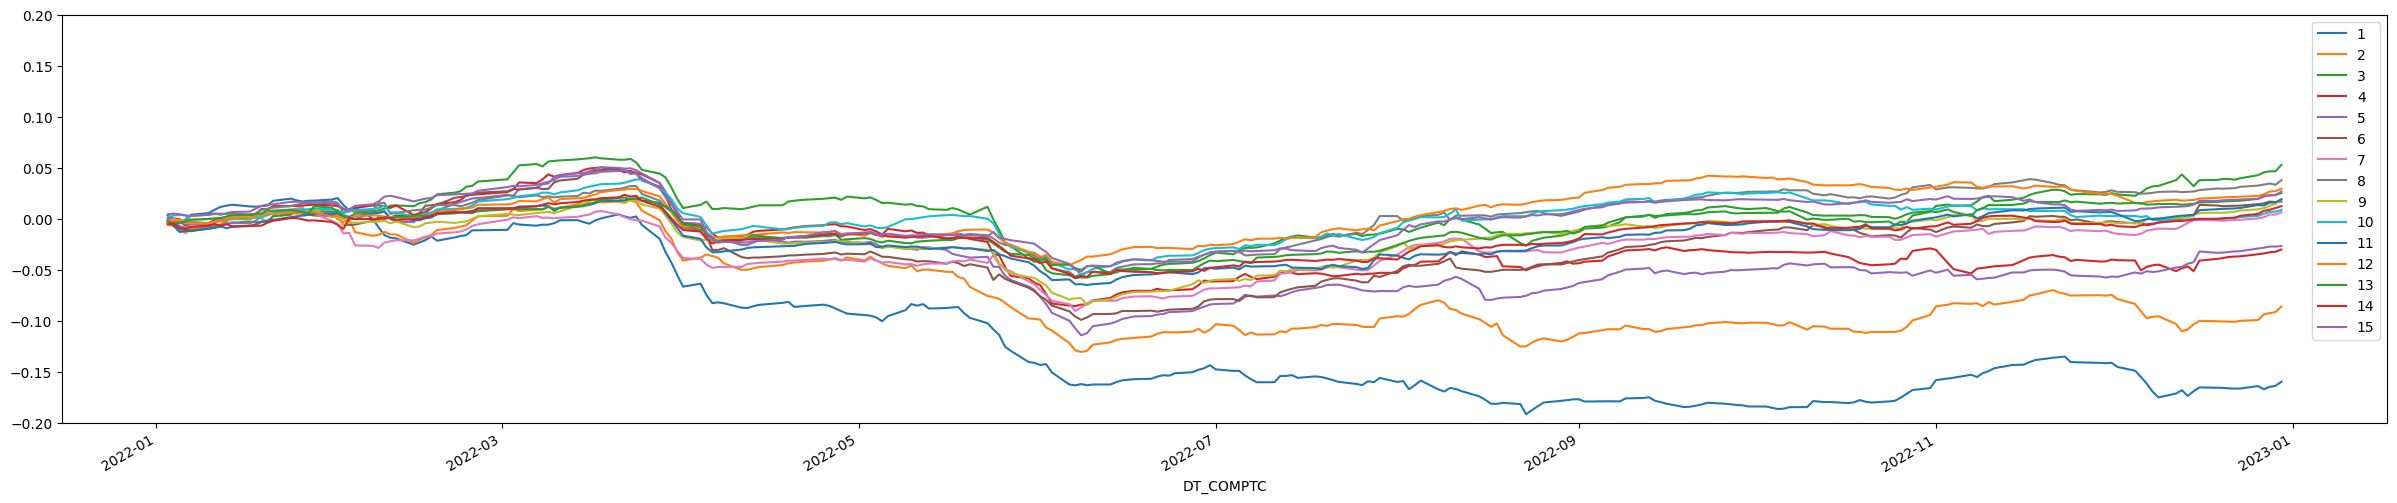

k: 0.0
l: -0.001
m: -0.004
m: -0.001
11
--


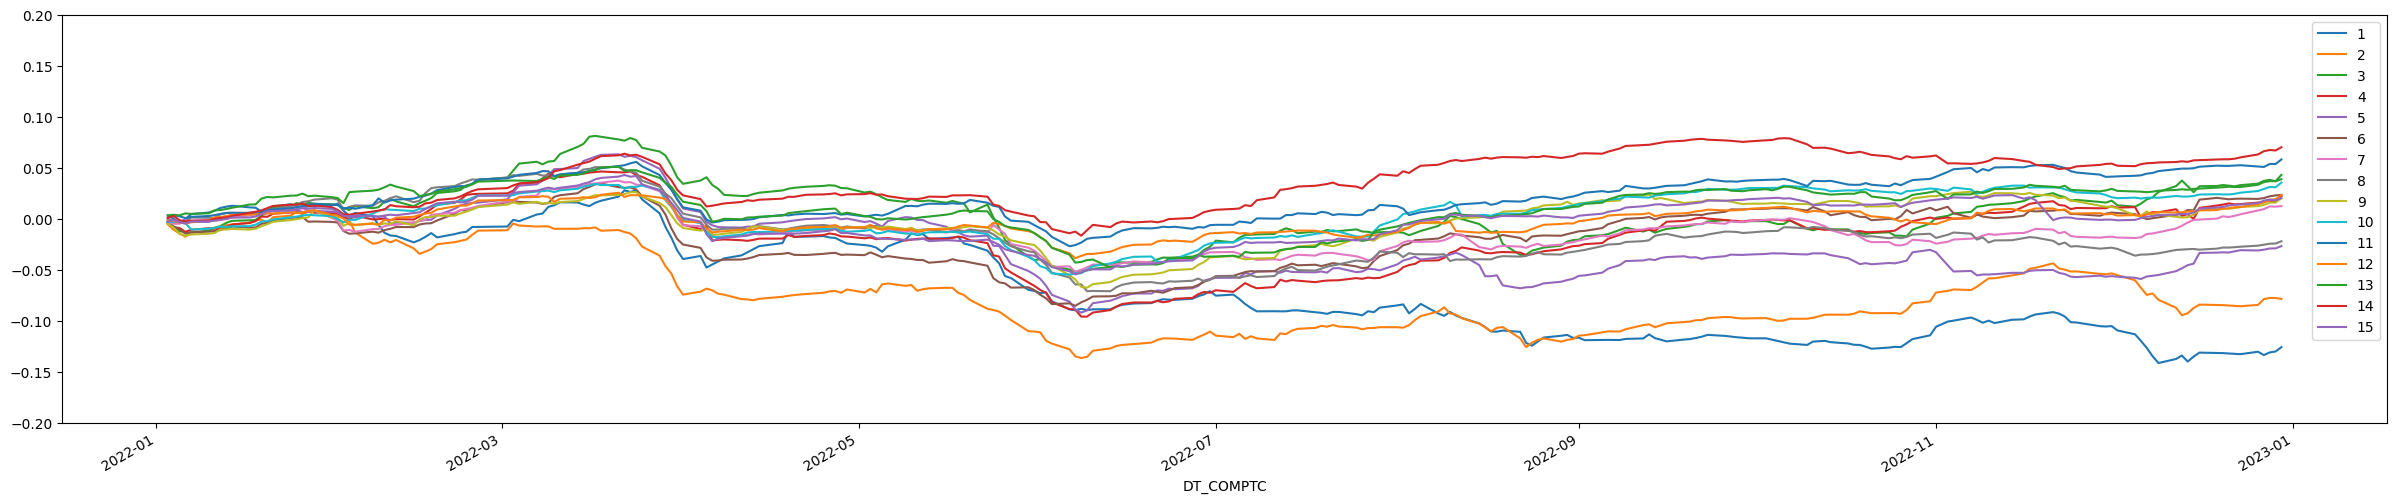

k: 0.001
l: -0.001
m: -0.004
m: -0.001
12
--


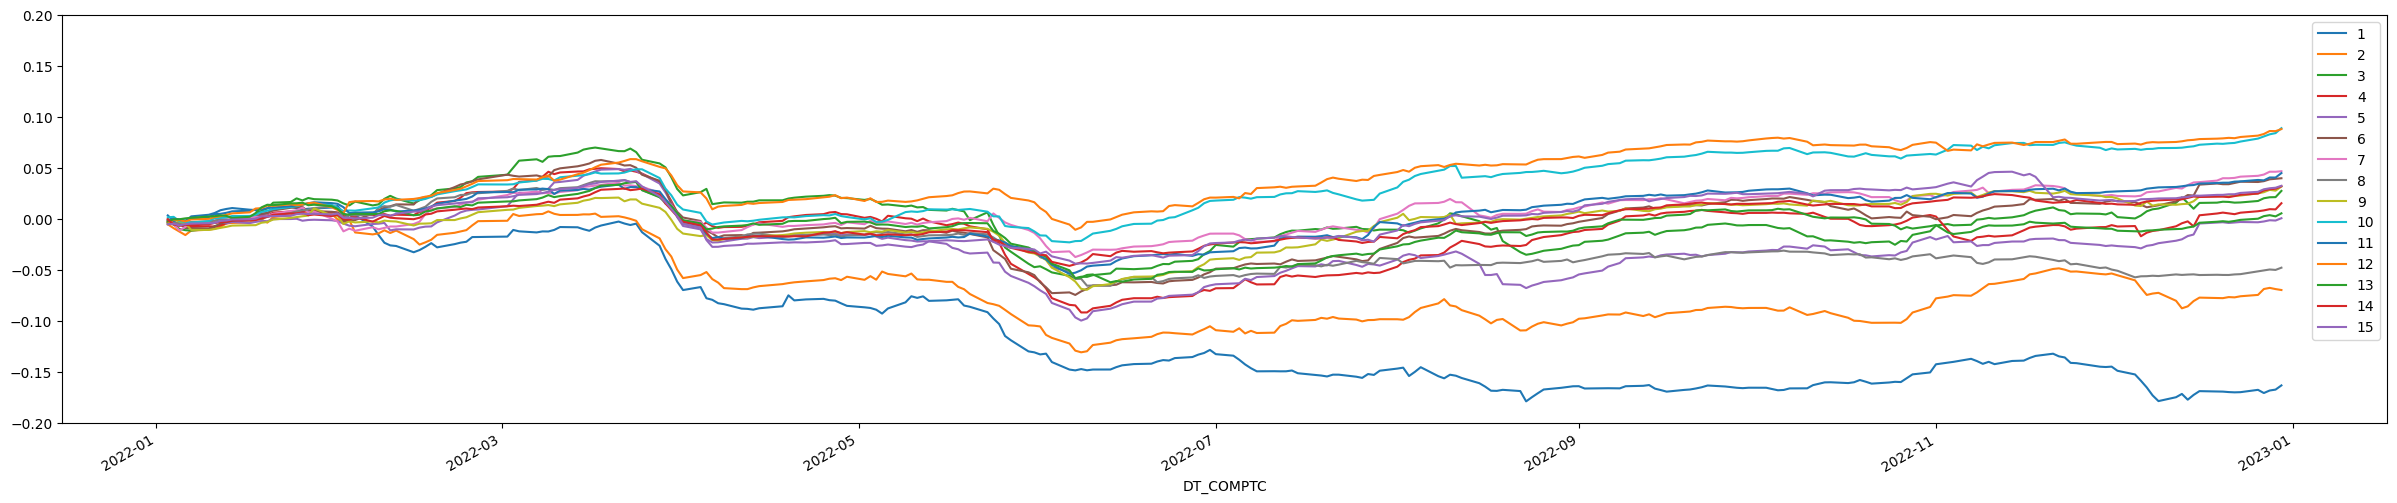

k: 0.0
l: 0.0
m: -0.004
m: 0.0
11
--


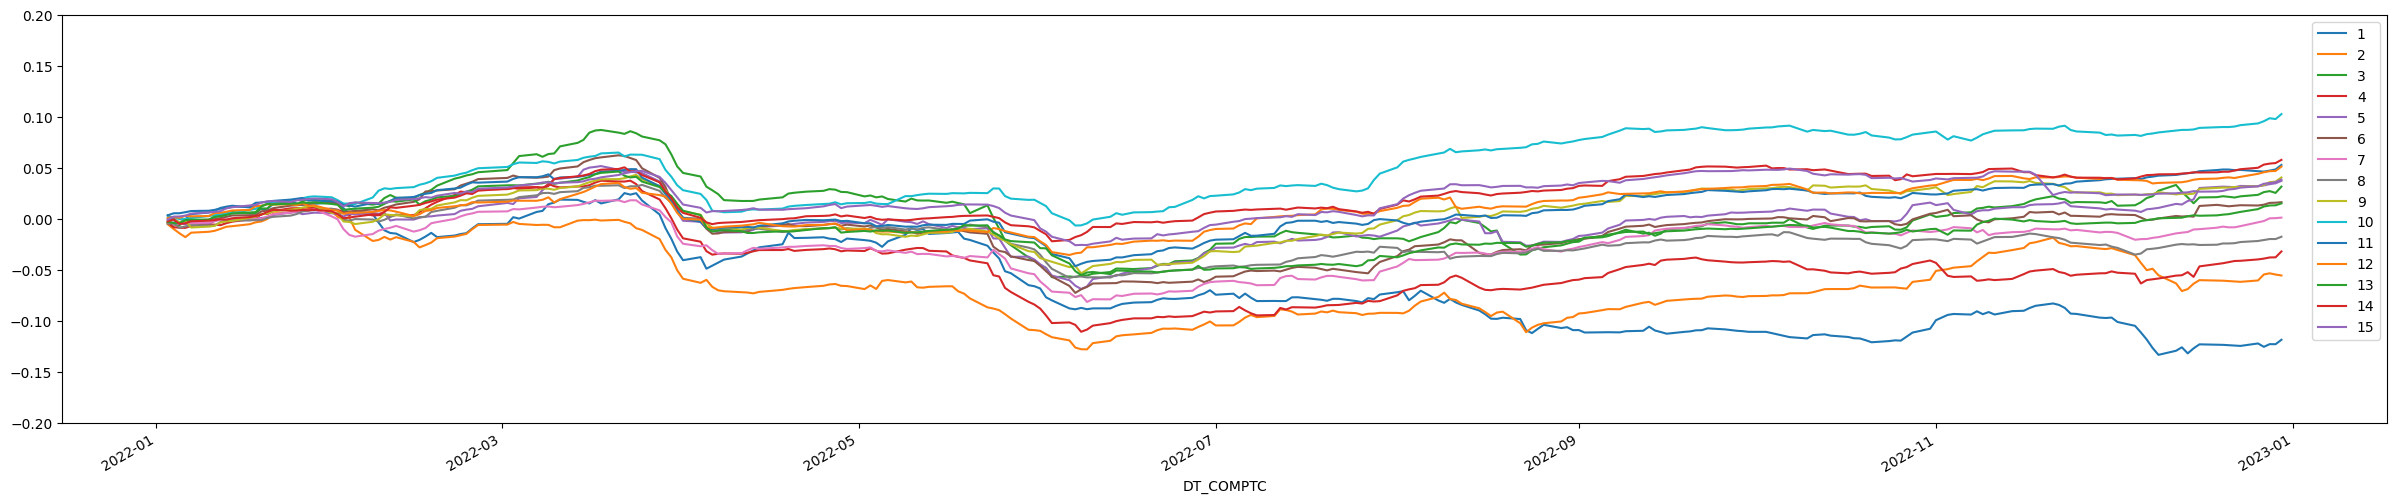

k: 0.001
l: 0.0
m: -0.004
m: -0.001
12
--


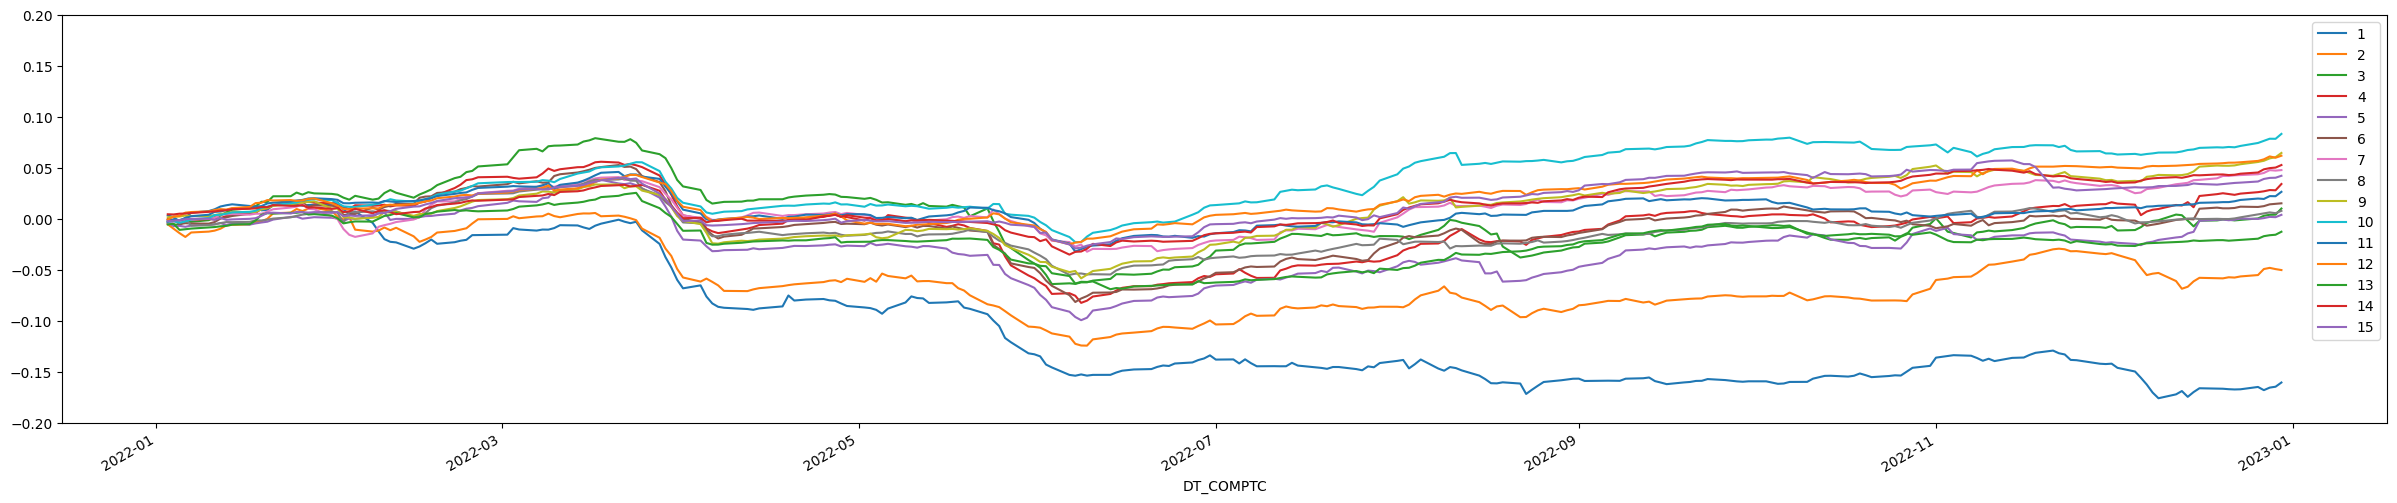

k: 0.001
l: 0.001
m: -0.004
m: -0.003
11
--


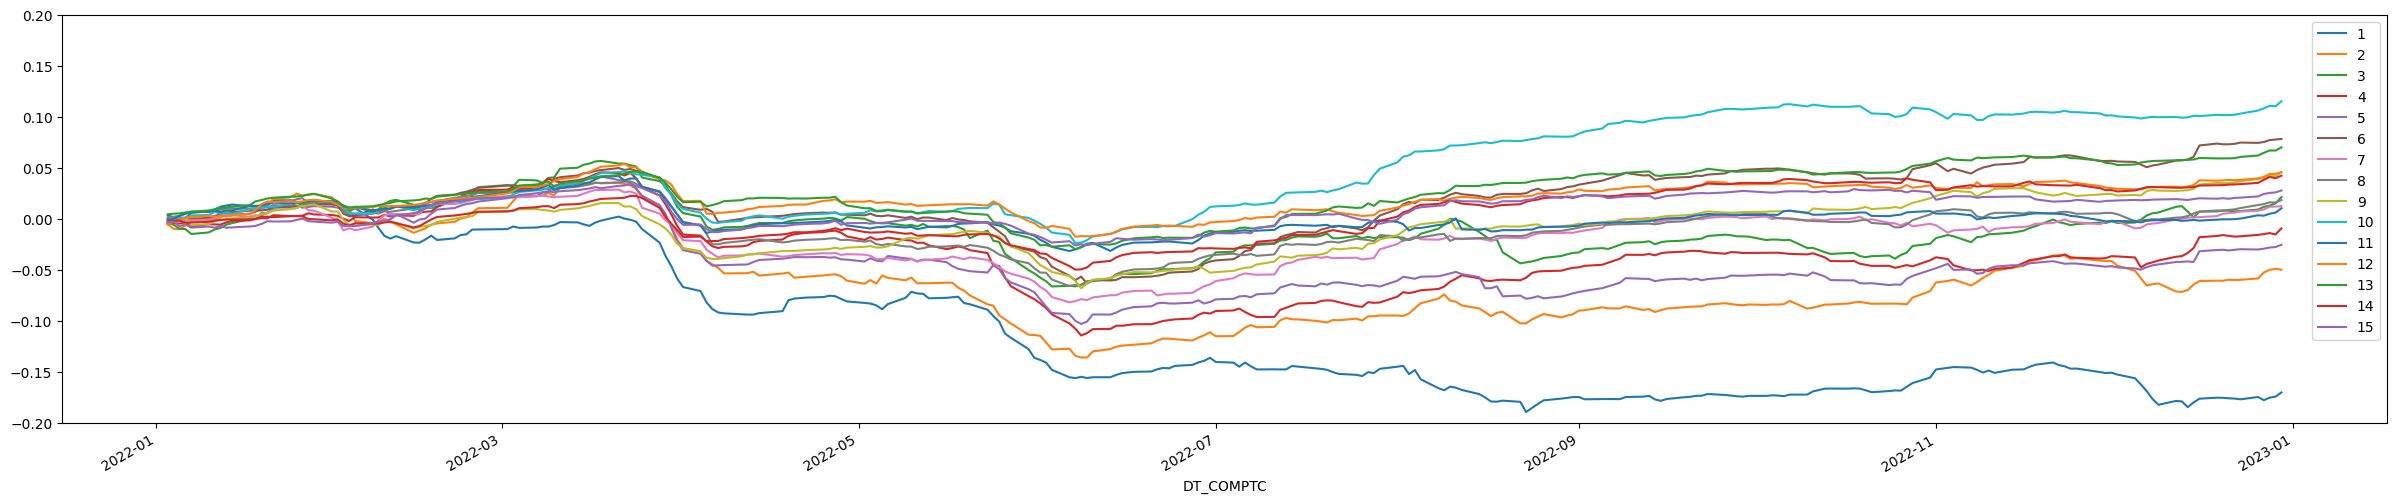

k: 0.001
l: 0.001
m: -0.004
m: -0.002
11
--


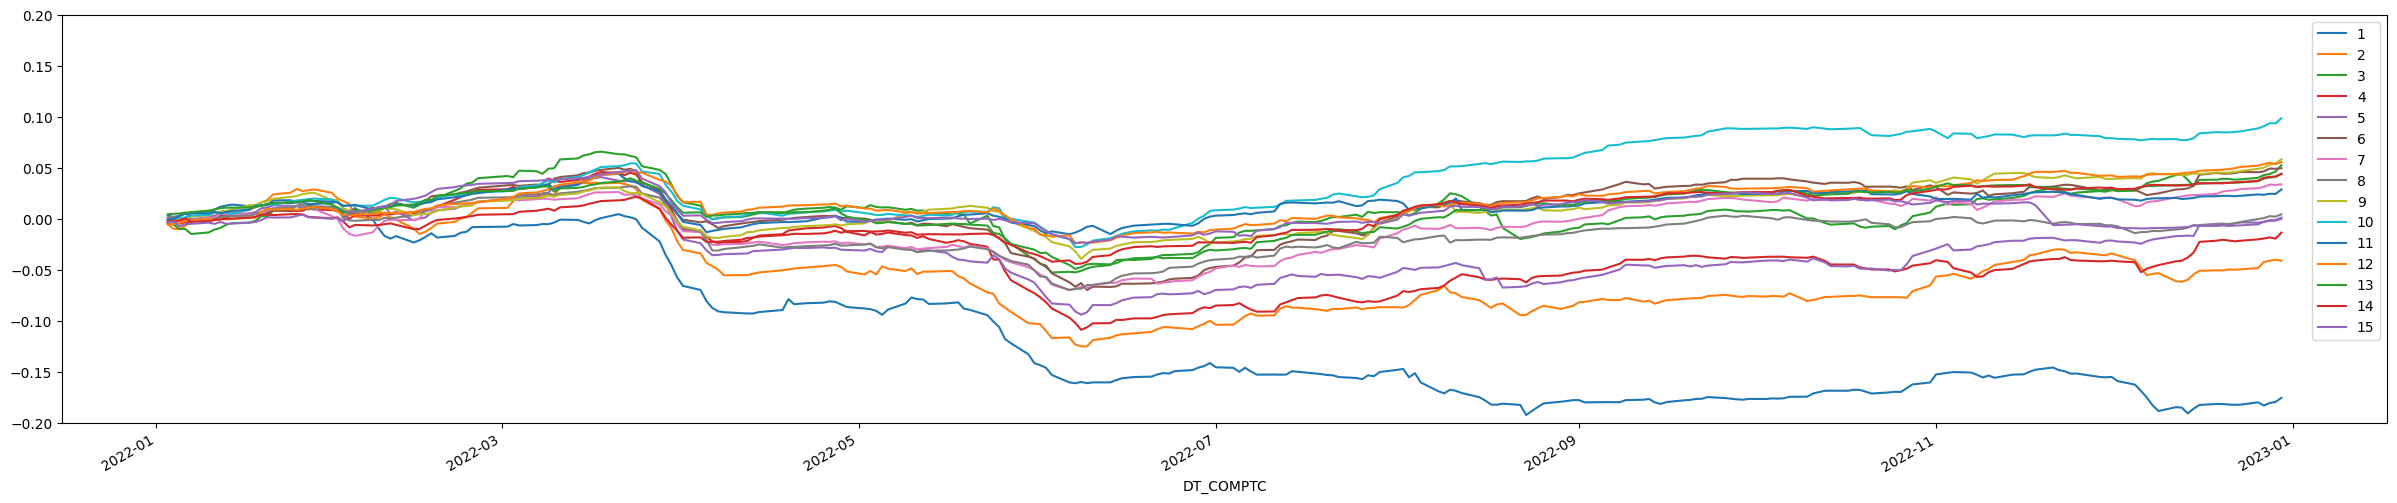

k: 0.001
l: 0.001
m: -0.004
m: -0.001
13
--


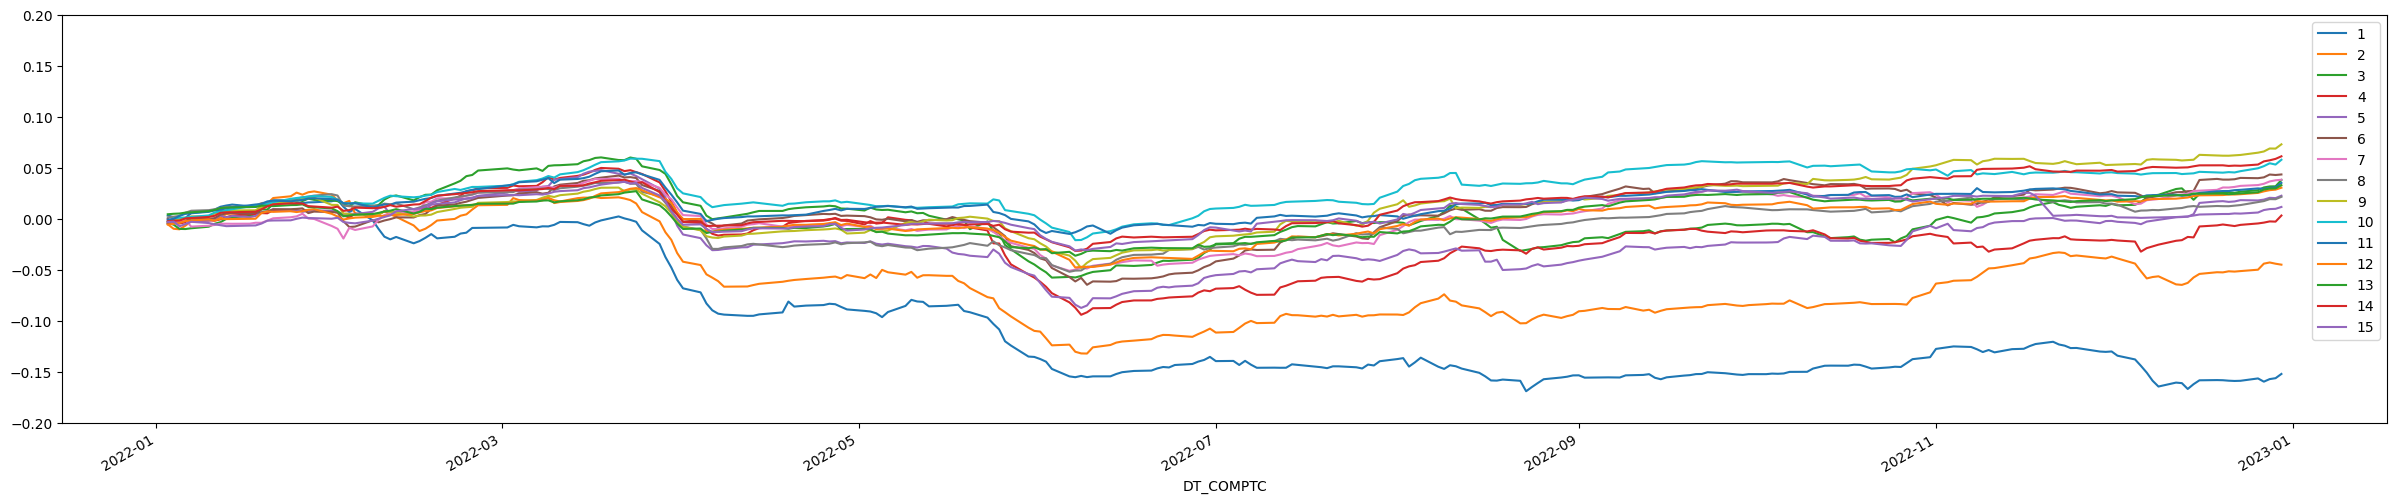

k: 0.0
l: 0.0
m: -0.003
m: 0.0
12
--


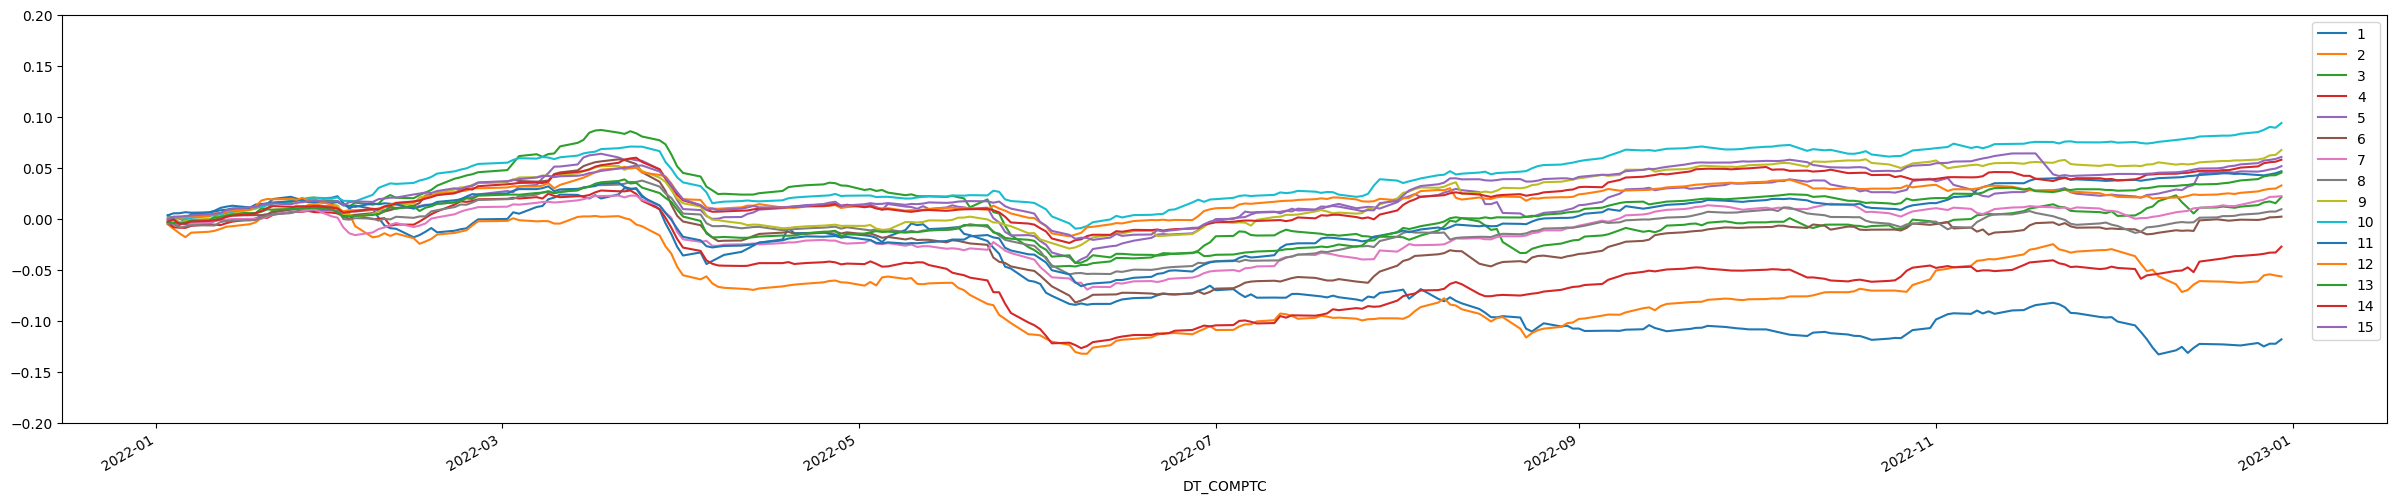

k: 0.001
l: 0.001
m: -0.003
m: -0.001
12
--


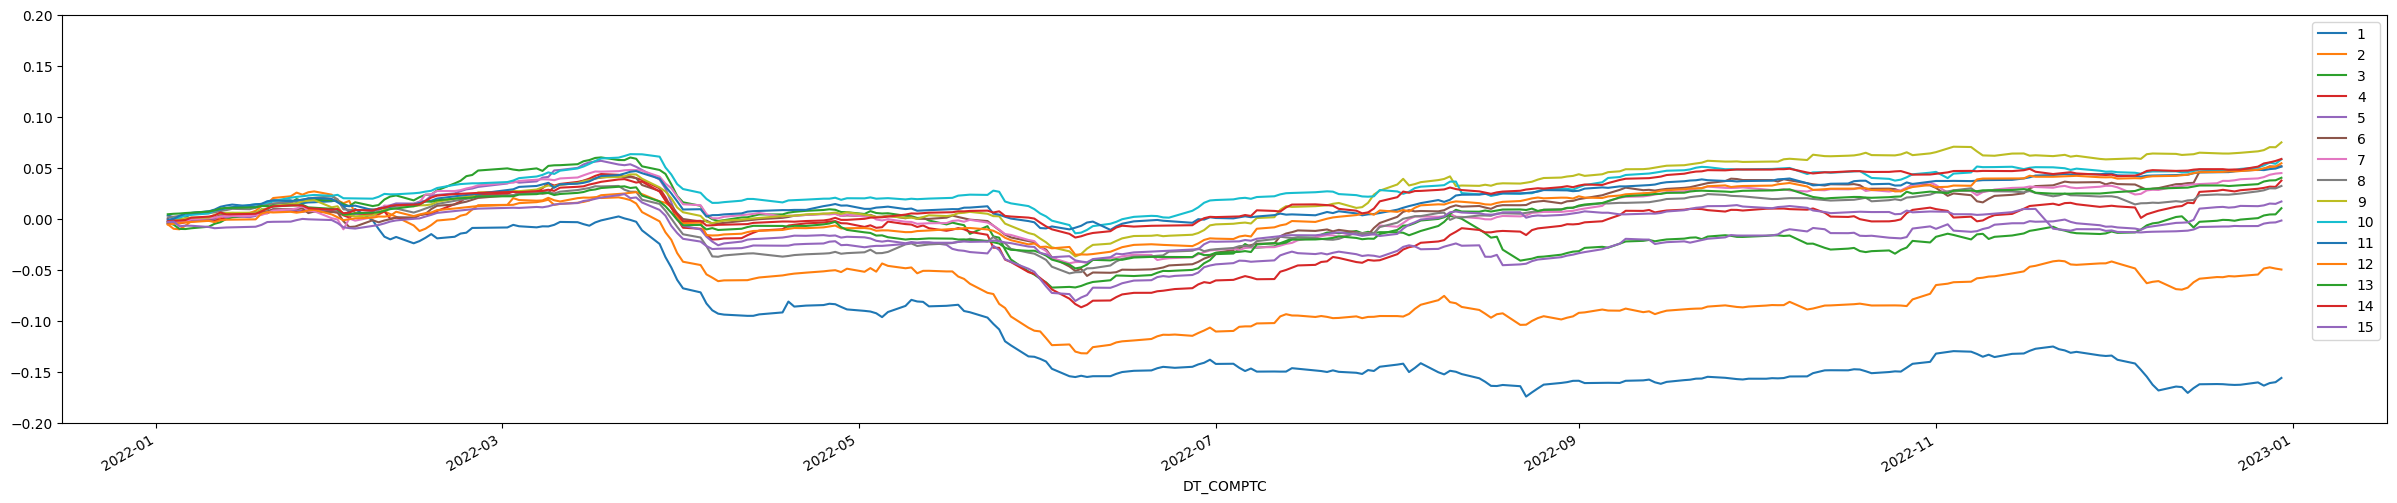

In [ ]:

lf_days = 20
lb_days = 10
lf_gap = 1
lb_gap = 2
weeks = 5
week_days = 2


df_ini = df_cap.copy()

# enriquece
df_ini = df_ini[['DENOM_SOCIAL','CNPJ_FUNDO', 'VL_QUOTA','DT_COMPTC']]
df_ini['DT_COMPTC'] = pd.to_datetime(df_ini['DT_COMPTC'])
df_ini['Card'] = 0
df_ini['year'] = df_ini['DT_COMPTC'].dt.year
df_ini = df_ini.sort_values(by=['CNPJ_FUNDO', 'DT_COMPTC'], ascending=False) 

df_ini['lf_val'] = (df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(lf_days+lf_gap) / df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(lf_gap))**(1/lf_days) - 1

# df_ini[['DT_COMPTC','VL_QUOTA','lf_val','CNPJ_FUNDO']][df_ini['CNPJ_FUNDO'] =='46.300.375/0001-78']


for i in range(weeks) :
    label = 'lb_spot_'+str(i*week_days)+'-'+str((i+1)*week_days)
    df_ini[label] = (df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(-(lb_gap+ i*week_days))/df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(-(lb_gap+ (i+1)*week_days)))**(1/week_days) - 1


for i in range(lb_days) :
    df_ini['lb'+str(i+lb_gap)] = df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(-lb_gap-i)/df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(-lb_gap-i-1) - 1

# input e output
df_ini['lb_val'] = df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(-lb_gap)/df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(-lb_gap-lb_days) -1


df_ini = df_ini.replace([np.inf, -np.inf, -1], np.nan)
df_ini = df_ini.dropna()

max = -10

sss = df_ini.copy()
for m in range(8) :
  for l in range(8) :
    for k in range(8) :
      for n in range(8) :

          df_ini = sss.copy()
          df_ini = df_ini[(df_ini['lb_spot_0-2']>-0.004 + 0.001*k)]
          df_ini = df_ini[(df_ini['lb_spot_2-4']>-0.004 + 0.001*l)]
          df_ini = df_ini[(df_ini['lb_spot_4-6']>-0.004 + 0.001*m)]
          df_ini = df_ini[(df_ini['lb_spot_6-8']>-0.004 + 0.001*n)]

          df_ini['lb_rank'] = df_ini.groupby('DT_COMPTC')['lb_val'].rank(method='dense', ascending=False)

          count_pos = 0
          acc = 0
          for i in range(1,16) :
              df_classic = df_ini[df_ini['year'].isin([2022])]
              # df_classic = df_ini.copy()
              df_classic = df_classic.set_index('DT_COMPTC')
              df_classic = df_classic.sort_index()
              df_classic = df_classic[df_classic['lb_rank'] == i]['lf_val']
              df_classic =(df_classic+1).cumprod()-1
              df_classic.plot(figsize=(30,6),ylim=(-0.2,0.2))
              # print(df_classic)
              acc = acc+df_classic[-1]
              if df_classic[-1] > 0 :
                  count_pos = count_pos + 1
              plt.legend(range(1,16))
          # print(count_pos)
          # print(acc)
          # print(max)
          if (count_pos >= 11) & (acc>max) :
              max = acc
              print('k:',-0.004 + 0.001*k)
              print('l:',-0.004 + 0.001*l)
              print('m:',-0.004 + 0.001*m)
              print('m:',-0.004 + 0.001*n)
              print(count_pos)
              print('--')
              plt.show()
          else :
              plt.clf()





In [ ]:
df_classic


In [ ]:

import warnings
warnings.filterwarnings("ignore")

for lf_days in range(20,40,5) :
  for lb_days in range(15,30,5) :

# for recur in range(6) :
#   for cap_val in range(1,6) :
    recur = 200
    cap_val = -1
    # cap_val = -0.01 * cap_val
    # lf_days = 20
    # lb_days = 20
    lf_gap = 1
    lb_gap = 2

    df_ini = df_cap.copy()

    # enriquece
    df_ini = df_ini[['DENOM_SOCIAL', 'VL_QUOTA','DT_COMPTC']]
    df_ini['DT_COMPTC'] = pd.to_datetime(df_ini['DT_COMPTC'])
    df_ini['Card'] = 0
    df_ini['year'] = df_ini['DT_COMPTC'].dt.year
    df_ini = df_ini.sort_values(by=['DENOM_SOCIAL', 'DT_COMPTC']) 

    # input e output
    df_ini['lb_val'] = df_ini.groupby('DENOM_SOCIAL')['VL_QUOTA'].shift(lb_gap)/df_ini.groupby('DENOM_SOCIAL')['VL_QUOTA'].shift(lb_gap+lb_days) -1
    df_ini['lb_rank'] = df_ini.groupby('DT_COMPTC')['lb_val'].rank(method='dense', ascending=False)

    df_ini['lf_val'] = df_ini.groupby('DENOM_SOCIAL')['VL_QUOTA'].shift(-(lf_gap+lf_days))/df_ini.groupby('DENOM_SOCIAL')['VL_QUOTA'].shift(-lf_gap) -1

    for i in range(lb_gap,lb_gap+lb_days) :
        df_ini['lb'+str(i)] = df_ini.groupby('DENOM_SOCIAL')['VL_QUOTA'].shift(i)/df_ini.groupby('DENOM_SOCIAL')['VL_QUOTA'].shift(i+1) - 1


    df_ini = df_ini.replace([np.inf, -np.inf, -1], np.nan)
    df_ini = df_ini.dropna()

    # tira lookbacks com 3 zeros ou mais 
    mask1 = df_ini.eq(0).sum(axis=1)<=2
    mask2 = df_ini.iloc[:, -lb_days:].le(cap_val).sum(axis=1)<=recur
    mask = mask1 & mask2
    df_ini = df_ini[mask]
    df_ini['Card'] = df_ini['DT_COMPTC'].rank(method='dense')

    min = 10
    max = -10
    for i in range(1,11) :
        df_classic = df_ini[df_ini['year'].isin([2022])]
        # df_classic = df_ini.copy()
        df_classic = df_classic.set_index('DT_COMPTC')
        df_classic = df_classic.sort_index()
        df_classic = df_classic[df_classic['lb_rank'] == i]['lf_val']
        df_classic =((df_classic+1)**(1/(lf_days))).cumprod()-1

        if (df_classic[-1] > -1) & (df_classic[-1] < 10) & (df_classic[-1] != 0) :
            if df_classic[-1] > max : max = df_classic[-1]
            if df_classic[-1] < min : min = df_classic[-1]

        df_classic.plot(figsize=(30,6),ylim=(-0.4,0.4))
        plt.legend(range(1,11))
    print('Lookback:',lb_days)
    print('Lookforward:',lf_days)

    # print('recur:',recur)
    # print('cap_val:',cap_val)

    print('max:', max)
    print('min:', min)
    plt.show()



In [ ]:

# for lf_days in range(20,55,5) :
#   for lb_days in range(10,35,5) :

for recur in range(6) :
  for cap_val in range(1,6) :
    # recur = 2
    # cap_val = -0.01
    cap_val = -0.01 * cap_val
    lf_days = 20
    lb_days = 20
    lf_gap = 1
    lb_gap = 2

    df_ini = df_cap.copy()

    # enriquece
    df_ini = df_ini[['DENOM_SOCIAL', 'VL_QUOTA','DT_COMPTC']]
    df_ini['DT_COMPTC'] = pd.to_datetime(df_ini['DT_COMPTC'])
    df_ini['Card'] = 0
    df_ini['year'] = df_ini['DT_COMPTC'].dt.year
    df_ini = df_ini.sort_values(by=['DENOM_SOCIAL', 'DT_COMPTC']) 

    # input e output
    df_ini['lb_val'] = df_ini.groupby('DENOM_SOCIAL')['VL_QUOTA'].shift(lb_gap)/df_ini.groupby('DENOM_SOCIAL')['VL_QUOTA'].shift(lb_gap+lb_days) -1
    df_ini['lb_rank'] = df_ini.groupby('DT_COMPTC')['lb_val'].rank(method='dense', ascending=False)

    
    df_ini['lf_val'] = df_ini.groupby('DENOM_SOCIAL')['VL_QUOTA'].shift(-(lf_gap+lf_days))/df_ini.groupby('DENOM_SOCIAL')['VL_QUOTA'].shift(-lf_gap) -1

    for i in range(lb_gap,lb_gap+lb_days) :
        df_ini['lb'+str(i)] = df_ini.groupby('DENOM_SOCIAL')['VL_QUOTA'].shift(i)/df_ini.groupby('DENOM_SOCIAL')['VL_QUOTA'].shift(i+1) - 1


    df_ini = df_ini.replace([np.inf, -np.inf, -1], np.nan)
    df_ini = df_ini.dropna()

    # tira lookbacks com 3 zeros ou mais 
    mask1 = df_ini.eq(0).sum(axis=1)<=2
    mask2 = df_ini.iloc[:, -lb_days:].le(cap_val).sum(axis=1)<=recur
    mask = mask1 & mask2
    df_ini = df_ini[mask]
    df_ini['Card'] = df_ini['DT_COMPTC'].rank(method='dense')

    min = 10
    max = -10
    for i in range(1,11) :
        df_classic = df_ini[df_ini['year'].isin([2021])]
        df_classic = df_classic.set_index('DT_COMPTC')
        df_classic = df_classic.sort_index()
        df_classic = df_classic[df_classic['lb_rank'] == i]['lf_val']
        df_classic =((df_classic+1)**(1/(lf_days))).cumprod()-1

        if (df_classic[-1] > -1) & (df_classic[-1] < 10) & (df_classic[-1] != 0) :
            if df_classic[-1] > max : max = df_classic[-1]
            if df_classic[-1] < min : min = df_classic[-1]

        df_classic.plot(figsize=(30,6),ylim=(-0.2,0.2))
        plt.legend(range(1,11))
    # print('Lookback:',lb_days)
    # print('Lookforward:',lf_days)

    print('recur:',recur)
    print('cap_val:',cap_val)

    print('max:', max)
    print('min:', min)
    plt.show()



In [ ]:
lf_gap = 1
lf_days = 4
lb_gap = 2
lb_days = 4

df_ini = df_cap.copy()

# enriquece
df_ini = df_ini[['DENOM_SOCIAL','CNPJ_FUNDO', 'VL_QUOTA','DT_COMPTC']]
df_ini['DT_COMPTC'] = pd.to_datetime(df_ini['DT_COMPTC'])
df_ini['Card'] = 0
df_ini['Mask'] = False
df_ini['year'] = df_ini['DT_COMPTC'].dt.year
df_ini = df_ini.sort_values(by=['CNPJ_FUNDO', 'DT_COMPTC'], ascending=False) 

# input e output
# lb_len_classic = lb_days
# df_ini['lb_val'] = df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(lb_gap)/df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(lb_gap+lb_len_classic) -1
# df_ini['lb_rank'] = df_ini.groupby('DT_COMPTC')['lb_val'].rank(method='dense', ascending=False)

input_real = []

# df_ini['lf_real'] = df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(lf_days+lf_gap) / df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(lf_gap) - 1
# weeks = 10
# for i in range(weeks) :
#     df_ini['lb_acc_real'+str(5+i*5)] = ((df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(-lb_gap)/df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(-lb_gap-i*5-4) - 1))
#     input_real.append('lb_acc_real'+str(5+i*5))

input_train = []

df_ini['lf_train'] = df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(0) / df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(-lf_days) - 1
weeks = 10
for i in range(weeks) :
    df_ini['lb_acc_train'+str(5+i*5)] = ((df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(-lf_days-lf_gap-lb_gap)/df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(-lf_days-lf_gap-lb_gap-i*5-4) - 1))
    df_ini['lb_acc_train'+str(5+i*5)] = df_ini.groupby('DT_COMPTC')['lb_acc_train'+str(5+i*5)].rank(method='dense', ascending=False)
    df_ini['Mask'] = df_ini['Mask'] | (df_ini['lb_acc_train'+str(5+i*5)] == 1)
    input_train.append('lb_acc_train'+str(5+i*5))

df_ini = df_ini[df_ini['Mask']]
df_ini['Mask'] = df_ini.groupby('DT_COMPTC')['lf_train'].rank(method='dense', ascending=False) == 1
df_ini = df_ini[df_ini['Mask']]



df_ini = df_ini.replace([np.inf, -np.inf, -1], np.nan)
df_ini = df_ini.dropna()

for i in range(weeks) :
    coluna = 'lb_acc_train'+str(5+i*5)
    df_ini[coluna] = df_ini[coluna].apply(lambda x: coluna if x == 1 else '')

df_ini













# # tira lookbacks com 3 zeros ou mais 
# mask = df_ini.eq(0).sum(axis=1)<=2
# df_ini = df_ini[mask]
# df_ini['Card'] = df_ini['DT_COMPTC'].rank(method='dense')



In [ ]:

import warnings
warnings.filterwarnings("ignore")
df_ini = df_cap.copy()

df_ini = df_ini[['CNPJ_FUNDO', 'VL_QUOTA','DT_COMPTC']]
df_ini['DT_COMPTC'] = pd.to_datetime(df_ini['DT_COMPTC'])
df_ini['Card'] = 0
df_ini['Mask'] = False
df_ini['year'] = df_ini['DT_COMPTC'].dt.year
df_ini = df_ini.sort_values(by=['CNPJ_FUNDO', 'DT_COMPTC']) 

lf_gap = 1
lb_gap = 2

for lb_days in range(5,35,5) :
    df_ini['lb_old'+str(lb_days)] = df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(lf_days + lf_gap + lb_gap)/df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(lf_days + lf_gap + lb_gap + lb_days) -1

df_ini = df_ini.replace([np.inf, -np.inf, -1], np.nan)
df_ini = df_ini.dropna()

n = 1
for lb_days in range(5,35,5) :
    df_ini['lb_rank_old'+str(lb_days)] = df_ini.groupby('DT_COMPTC')['lb_old'+str(lb_days)].rank(method='dense', ascending=False)
    df_ini['Mask'] = df_ini['Mask'] | (df_ini['lb_rank_old'+str(lb_days)] == 1)

for lf_days in range(20,40,5) :
    df_ini['lf_old'+str(lf_days)] = (df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(0)/df_ini.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(lf_days))**(1/lf_days) -1
df_ini = df_ini[df_ini['Mask']]

lf_old_col = ['lf_old'+str(lf_days) for lf_days in range(20,40,5)]


# maior_valor_por_dia = df_ini.groupby('DT_COMPTC')[lf_old_col].max()
# maior_coluna_por_dia = maior_valor_por_dia.idxmax(axis=1)
display(df_ini)

# for lb_days in range(5,35,5) :
#     df_ini.drop([lb_rank_old'+str(lb_days)], axis=1)
# maior_coluna_por_dia
# display(df_ini[df_ini['DT_COMPTC']==df_ini['DT_COMPTC'].max()])

In [ ]:





# # for recur in range(6) :
# #   for cap_val in range(1,6) :
#     recur = 200
#     cap_val = -1
#     # cap_val = -0.01 * cap_val
#     # lf_days = 20
#     # lb_days = 20

# df_ini = df_cap.copy()

# # enriquece

# # input e output


# for i in range(lb_gap,lb_gap+lb_days) :
#     df_ini['lb'+str(i)] = df_ini.groupby('DENOM_SOCIAL')['VL_QUOTA'].shift(i)/df_ini.groupby('DENOM_SOCIAL')['VL_QUOTA'].shift(i+1) - 1


# df_ini = df_ini.replace([np.inf, -np.inf, -1], np.nan)
# df_ini = df_ini.dropna()

# # tira lookbacks com 3 zeros ou mais 
# mask1 = df_ini.eq(0).sum(axis=1)<=2
# mask2 = df_ini.iloc[:, -lb_days:].le(cap_val).sum(axis=1)<=recur
# mask = mask1 & mask2
# df_ini = df_ini[mask]
# df_ini['Card'] = df_ini['DT_COMPTC'].rank(method='dense')

# min = 10
# max = -10
# for i in range(1,11) :
#     df_classic = df_ini[df_ini['year'].isin([2022, 2023])]
#     df_classic = df_classic.set_index('DT_COMPTC')
#     df_classic = df_classic.sort_index()
#     df_classic = df_classic[df_classic['lb_rank'] == i]['lf_val']
#     df_classic =((df_classic+1)**(1/(lf_days))).cumprod()-1

#     if (df_classic[-1] > -1) & (df_classic[-1] < 10) & (df_classic[-1] != 0) :
#         if df_classic[-1] > max : max = df_classic[-1]
#         if df_classic[-1] < min : min = df_classic[-1]

#     df_classic.plot(figsize=(30,6),ylim=(-0.2,0.2))
#     plt.legend(range(1,11))
# print('Lookback:',lb_days)
# print('Lookforward:',lf_days)

# # print('recur:',recur)
# # print('cap_val:',cap_val)

# print('max:', max)
# print('min:', min)
# plt.show()

